<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [8]:
## Write your code here
df_cleaned = pd.read_csv(file_path)
print(df_cleaned.head())       # Primeras 5 filas
print(df_cleaned.info())       # Información general
print(df_cleaned.describe())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [9]:
## Write your code here
# Identify missing values for all columns
missing_values = df_cleaned.isnull().sum()

# Filter columns that have missing values
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display the result
print("=== Columns with Missing Values ===")
print(missing_values)

print(f"\nTotal columns with missing data: {len(missing_values)}")


=== Columns with Missing Values ===
AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
                              ...  
YearsCode                      5568
NEWSOSites                     5151
LearnCode                      4949
EdLevel                        4653
AISelect                       4530
Length: 109, dtype: int64

Total columns with missing data: 109


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



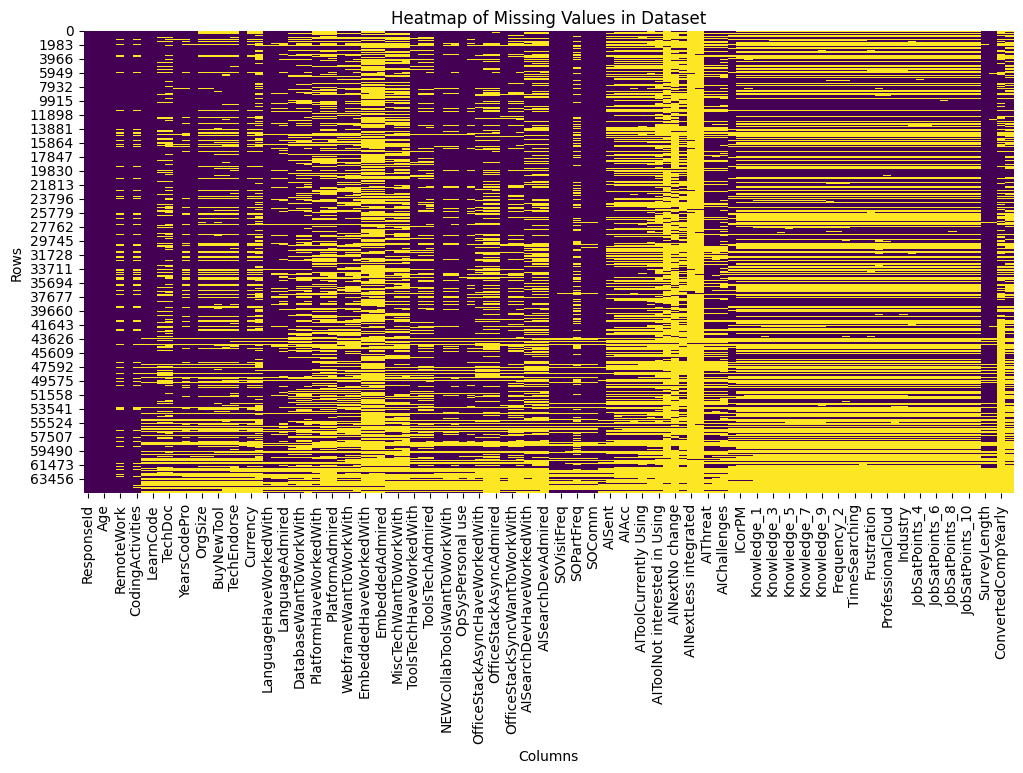

In [11]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el heatmap: True = valores faltantes
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')

plt.title("Heatmap of Missing Values in Dataset")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [12]:
## Write your code here
# Count missing values in a specific column
missing_employment = df_cleaned['Employment'].isnull().sum()
print(f"Number of missing rows in 'Employment': {missing_employment}")


Number of missing rows in 'Employment': 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [14]:
## Write your code here
# Find the most frequent value in 'Employment' column
most_frequent_employment = df_cleaned['Employment'].mode()[0]
print(f"The most frequent value in 'Employment' is: {most_frequent_employment}")


The most frequent value in 'Employment' is: Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [17]:
## Write your code here
# Impute missing values in Employment column
most_frequent_employment = "Employed, full-time"
df_cleaned['Employment'] = df_cleaned['Employment'].fillna(most_frequent_employment)

# Verify that missing values are filled
missing_after_imputation = df_cleaned['Employment'].isnull().sum()
print(f"Number of missing values in 'Employment' after imputation: {missing_after_imputation}")


Number of missing values in 'Employment' after imputation: 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_1055/776339929.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Employment', order=df_cleaned['Employment'].value_counts().index, palette='viridis')
/tmp/ipykernel_1055/776339929.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


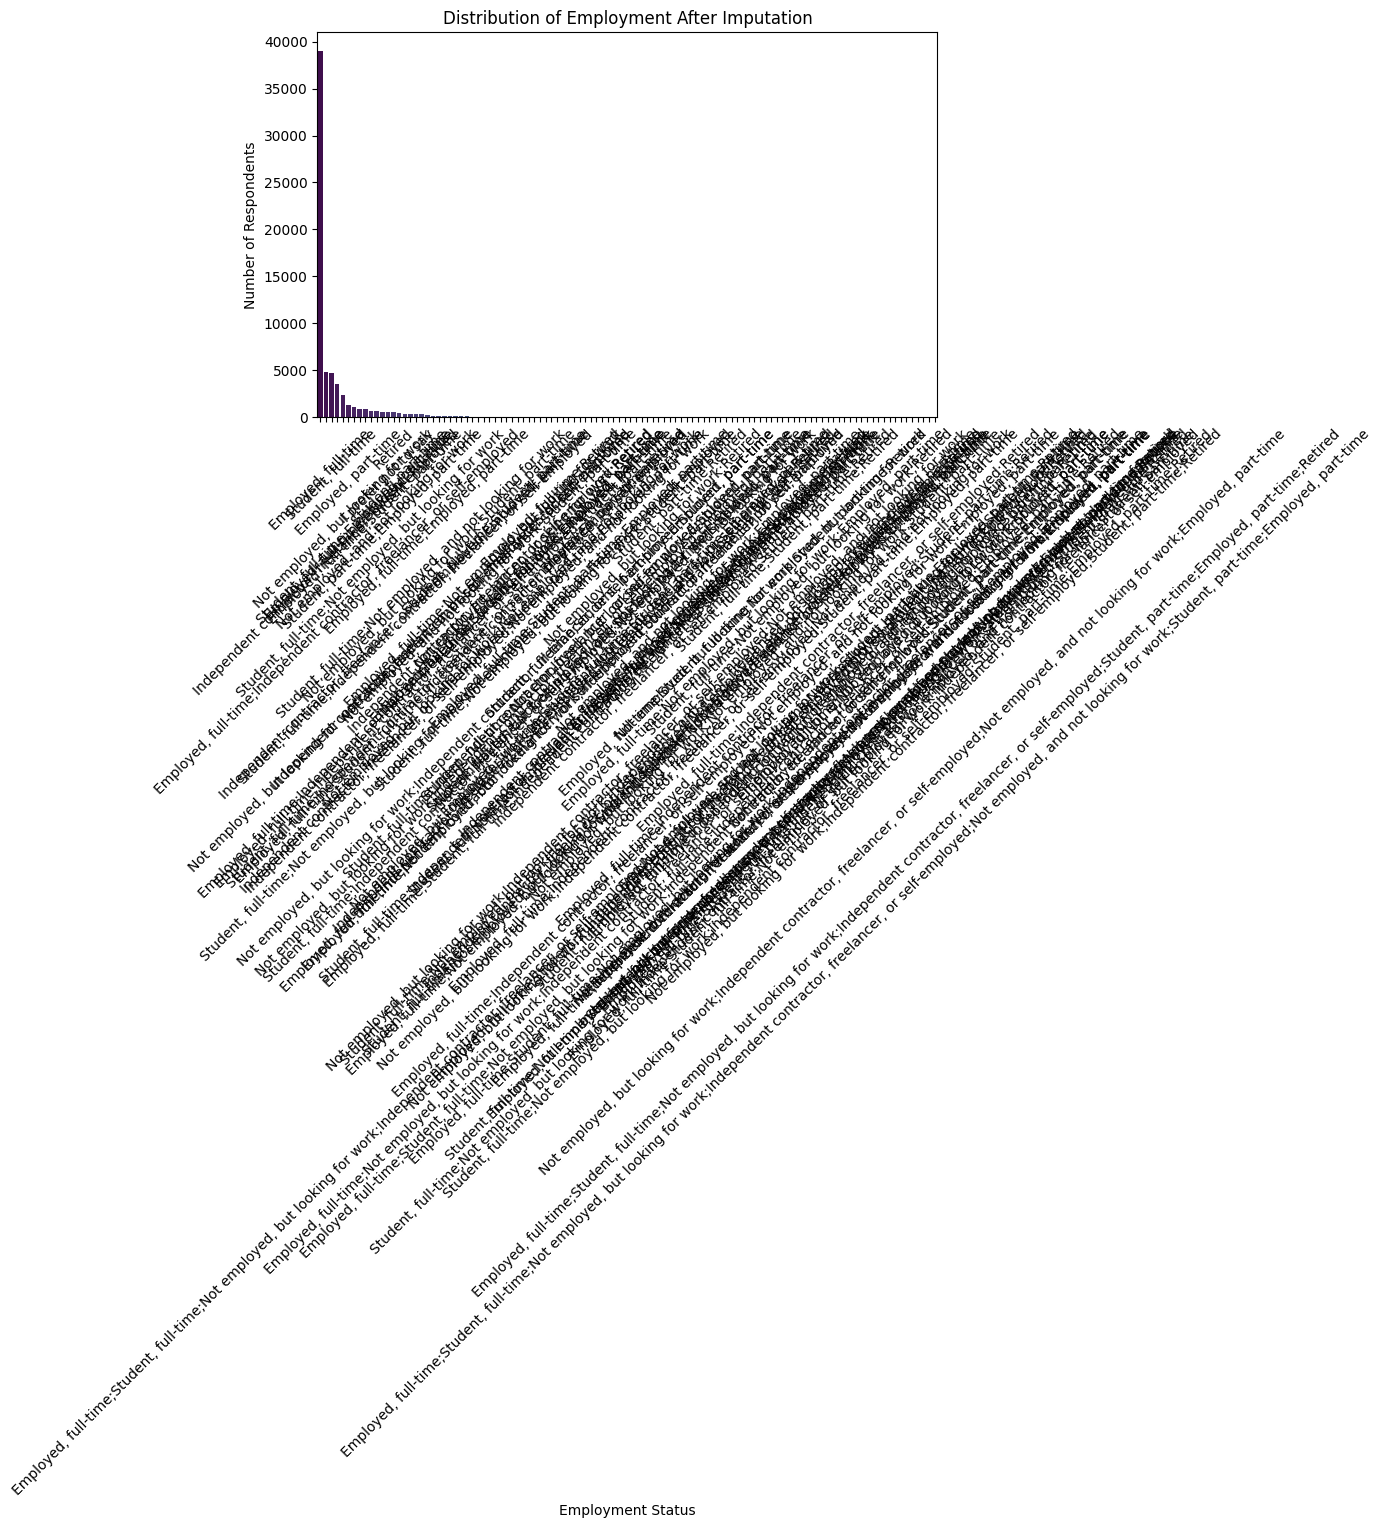

In [18]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8,5))

# Create a countplot for Employment
sns.countplot(data=df_cleaned, x='Employment', order=df_cleaned['Employment'].value_counts().index, palette='viridis')

# Add labels and title
plt.title("Distribution of Employment After Imputation")
plt.xlabel("Employment Status")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
